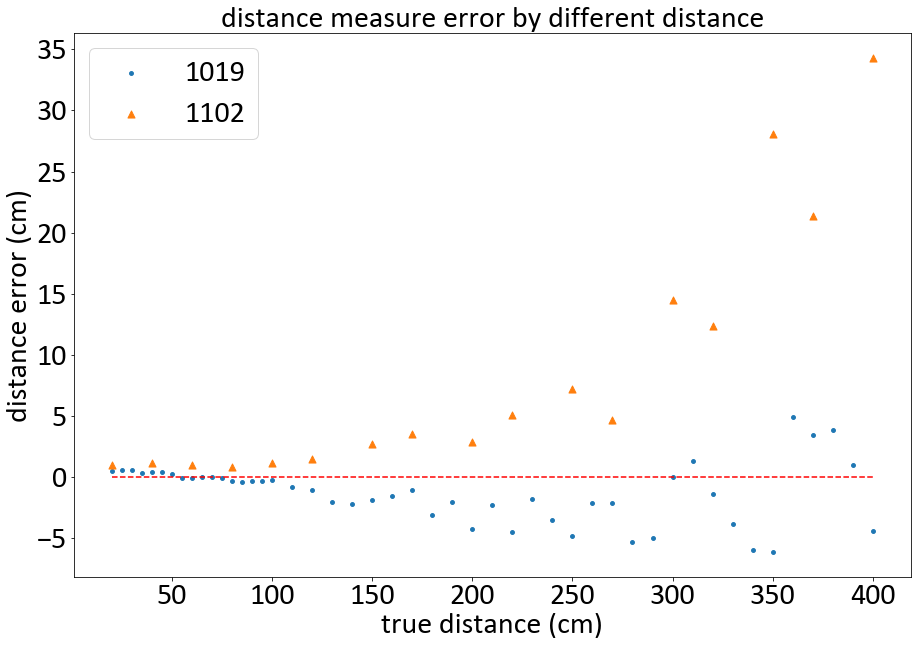

In [22]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
import numpy as np
from numpy import *

with open(r"C:\Users\jiant\Desktop\data\hardware-depth-measure\1019_data.txt", 'r', encoding='UTF-8') as f:
    logs = f.read().split('\n')
    logs_non_blank_line = [i for i in logs if i != '']
with open(r"C:\Users\jiant\Desktop\data\hardware-depth-measure\1019_data_GT.txt", 'r', encoding='UTF-8') as f:
    logs = f.read().split('\n')
    gt_non_blank_line = [i for i in logs if i != '']
gt = gt_non_blank_line[0].split(",")
gt = [int(i) for i in gt]
estimated = []
for i in range(0, len(logs_non_blank_line), 2):
    estimated.append(float(logs_non_blank_line[i + 1]) * 100)
diff = [estimated[i] - gt[i] for i in range(len(gt))]

# #################1102
gt_1102 = [20, 40, 60, 80, 100, 120, 150, 170, 200, 220, 250, 270, 300, 320, 350, 370, 400]
measured_1102 = [
    [0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21],
    [0.41098, 0.411, 0.41086, 0.41102, 0.411, 0.41098, 0.411, 0.4109, 0.41098, 0.41095],
    [0.60964, 0.60961, 0.61, 0.61036, 0.6096, 0.61, 0.61, 0.60978, 0.61009, 0.60949],
    [0.80881, 0.808, 0.80863, 0.80739, 0.80972, 0.80868, 0.80796, 0.808, 0.80892, 0.80767],
    [1.00888, 1.0132, 1.01102, 1.01058, 1.01338, 1.01348, 1.00952, 1.01174, 1.0101, 1.01094],
    [1.21263, 1.21074, 1.21209, 1.21764, 1.215, 1.215, 1.21509, 1.21827, 1.21917, 1.21353],
    [1.52326, 1.52264, 1.52908, 1.52948, 1.54215, 1.52359, 1.51277, 1.5248, 1.524, 1.53935],
    [1.73916, 1.732, 1.7329, 1.74118, 1.73068, 1.72846, 1.73855, 1.74948, 1.72558, 1.7335],
    [2.041281, 2.035921, 2.052101, 2.044471, 2.024801, 2.030401, 2.021681, 1.99174, 2.022161, 2.02],
    [2.228601, 2.253401, 2.235441, 2.299001, 2.218301, 2.246431, 2.285841, 2.221501, 2.270331, 2.246281],
    [2.587611, 2.602361, 2.549161, 2.565541, 2.574771, 2.578281, 2.565021, 2.564041, 2.573401, 2.556561],
    [2.740451, 2.772851, 2.741951, 2.747501, 2.735801, 2.741951, 2.721621, 2.740911, 2.765651, 2.753651],
    [3.117901, 3.218461, 3.156001, 3.195231, 3.109131, 3.097731, 3.159011, 3.172431, 3.147941, 3.074371],
    [3.294721, 3.341101, 3.333111, 3.386951, 3.311171, 3.361621, 3.278911, 3.331581, 3.293401, 3.301741],
    [3.819091, 3.786081, 3.794341, 3.765681, 3.746141, 3.738481, 3.800861, 3.752241, 3.826261, 3.776801],
    [3.977001, 3.885761, 3.870291, 3.955301, 3.916741, 3.924401, 3.875831, 3.891041, 3.914831, 3.924781],
    [4.469441, 4.352041, 4.348601, 4.312231, 4.256651, 4.262791, 4.395911, 4.432121, 4.273471, 4.327361]
]
measured_1102_mean = [mean(i) * 100 for i in measured_1102]
diff_1102 = [measured_1102_mean[i] - gt_1102[i] for i in range(len(gt_1102))]

# 创建figure窗口，figsize设置窗口的大小
plt.rcParams['figure.figsize'] = (15, 10)  # 单位是inches
# fig, axs = plt.subplots(2, 1)
# x y 标注
plt.ylabel('distance error (cm)', fontdict={'family': 'Calibri', 'size': 30})
plt.xlabel('true distance (cm)', fontdict={'family': 'Calibri', 'size': 30})
plt.title(f"distance measure error by different distance", fontdict={'family': 'Calibri', 'size': 30})
# 设置坐标轴范围
# plt.xlim((1, 5.7))
# plt.ylim((40, 90))
# 坐标轴取点间隔
# my_x_ticks = np.arange(0, 6, 1)
# my_y_ticks = np.arange(0.5, 0.9, 0.1)
# 坐标轴字体

plt.xticks(fontproperties='Calibri', size=30)
plt.yticks(fontproperties='Calibri', size=30)
# plt.xticks([1.3, 2.3, 3.3, 4.3, 5.3], [r'$n$', r'$s$', r'$m$', r'$l$', r'$x$'], size=25)

plt.scatter(gt, diff, label='1019', s=15, marker="o")
plt.scatter(gt_1102, diff_1102, label='1102', s=50, marker="^")
plt.hlines(0, 20, 400, colors="r", linestyles="dashed")

plt.legend(prop={'family': 'Calibri', 'size': 30})
plt.show()

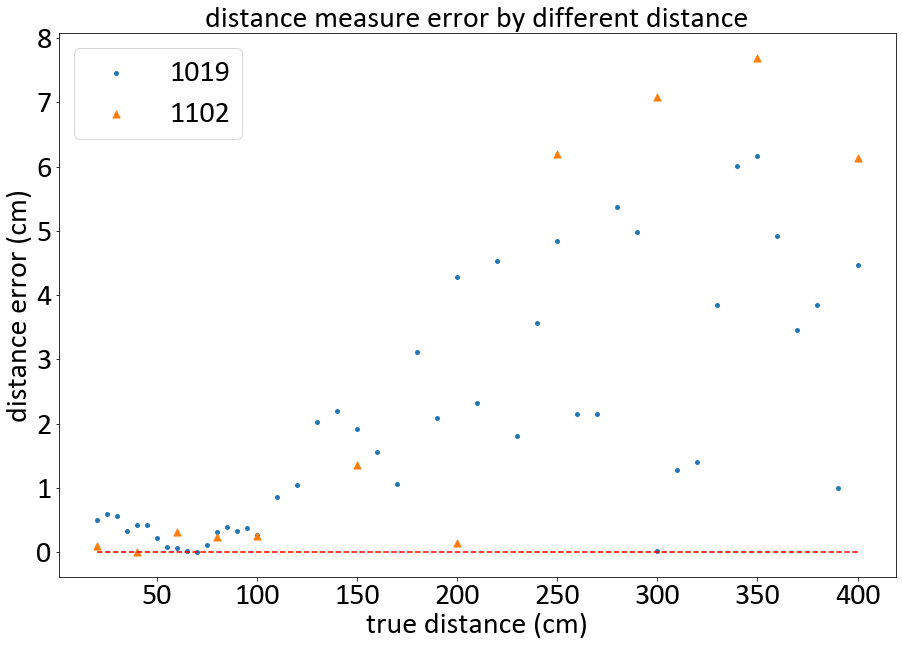

In [3]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
import numpy as np
from numpy import *

with open(r"C:\Users\jiant\Desktop\data\hardware-depth-measure\1019_data.txt", 'r', encoding='UTF-8') as f:
    logs = f.read().split('\n')
    logs_non_blank_line = [i for i in logs if i != '']
with open(r"C:\Users\jiant\Desktop\data\hardware-depth-measure\1019_data_GT.txt", 'r', encoding='UTF-8') as f:
    logs = f.read().split('\n')
    gt_non_blank_line = [i for i in logs if i != '']
gt = gt_non_blank_line[0].split(",")
gt = [int(i) for i in gt]
estimated = []
for i in range(0, len(logs_non_blank_line), 2):
    estimated.append(float(logs_non_blank_line[i + 1]) * 100)
diff = [abs(estimated[i] - gt[i]) for i in range(len(gt))]

# #################1102
gt_1102 = [20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400]
measured_1102 = [
    [0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201, 0.201],
    [0.4, 0.39964, 0.4, 0.3996, 0.4, 0.3996, 0.4, 0.4, 0.4, 0.4, 0.4, 0.39984, 0.3996, 0.40004, 0.40006, 0.4, 0.4, 0.4, 0.4, 0.4],
    [0.597, 0.59654, 0.59647, 0.59659, 0.597, 0.597, 0.59639, 0.597, 0.597, 0.597, 0.597, 0.597, 0.59688, 0.597, 0.597, 0.59706, 0.59706, 0.59697, 0.597, 0.597],
    [0.7974, 0.79765, 0.79802, 0.79789, 0.79791, 0.79767, 0.79796, 0.79792, 0.79753, 0.79753, 0.79738, 0.79777, 0.79765, 0.79756, 0.79761, 0.79761, 0.7977, 0.79712, 0.79767,
     0.79846],
    [1.00212, 1.00122, 1.00264, 1.0027, 1.00212, 1.00222, 1.00324, 1.0027, 1.00282, 1.00324, 1.00136, 1.00224, 1.00204, 1.00346, 1.0041, 1.00294, 1.00222, 1.00368, 1.00186,
     1.00184],
    [1.48736, 1.488, 1.488, 1.488, 1.4848, 1.488, 1.48244, 1.488, 1.484, 1.488, 1.48376, 1.4842, 1.48448, 1.484, 1.48776, 1.488, 1.48664, 1.4864, 1.4888, 1.488],
    [2.004, 2.00256, 1.99516, 2.00208, 2.00064, 1.99207, 1.99101, 1.9945, 1.99138, 1.99494, 2.0016, 1.99968, 2, 2.004, 2.004, 1.996, 1.99752, 2.004, 1.99166, 2.004],
    [2.55735, 2.56476, 2.5788, 2.56593, 2.558, 2.545, 2.571, 2.57243, 2.55501, 2.55826, 2.56775, 2.558, 2.56112, 2.5632, 2.558, 2.558, 2.56047, 2.55371, 2.56281, 2.56983],
    [3.07042, 3.0796, 3.04696, 3.0537, 3.06301, 3.07744, 3.0778, 3.07254, 3.08738, 3.06576, 3.067, 3.05104, 3.07215, 3.0706, 3.07546, 3.08942, 3.0769, 3.0679, 3.085, 3.06772],
    [3.5615, 3.6205, 3.61416, 3.53745, 3.53146, 3.5565, 3.46828, 3.59154, 3.58175, 3.58575, 3.46758, 3.58625, 3.623, 3.61298, 3.62078, 3.662, 3.5865, 3.52599, 3.65062, 3.55385],
    [3.9929, 4.05187, 4.05088, 4.05478, 4.08636, 4.07596, 4.04518, 4.06304, 4.04192, 4.12778, 4.08732, 4.03552, 4.0741, 4.07071, 4.10447, 4.09194, 4.01705, 4.0679, 4.0279, 4.05928]
]
measured_1102_mean = [mean(i) * 100 for i in measured_1102]
diff_1102 = [abs(measured_1102_mean[i] - gt_1102[i]) for i in range(len(gt_1102))]

# 创建figure窗口，figsize设置窗口的大小
plt.rcParams['figure.figsize'] = (15, 10)  # 单位是inches
# fig, axs = plt.subplots(2, 1)
# x y 标注
plt.ylabel('distance error (cm)', fontdict={'family': 'Calibri', 'size': 30})
plt.xlabel('true distance (cm)', fontdict={'family': 'Calibri', 'size': 30})
plt.title(f"distance measure error by different distance", fontdict={'family': 'Calibri', 'size': 30})
# 设置坐标轴范围
# plt.xlim((1, 5.7))
# plt.ylim((40, 90))
# 坐标轴取点间隔
# my_x_ticks = np.arange(0, 6, 1)
# my_y_ticks = np.arange(0.5, 0.9, 0.1)
# 坐标轴字体

plt.xticks(fontproperties='Calibri', size=30)
plt.yticks(fontproperties='Calibri', size=30)
# plt.xticks([1.3, 2.3, 3.3, 4.3, 5.3], [r'$n$', r'$s$', r'$m$', r'$l$', r'$x$'], size=25)

plt.scatter(gt, diff, label='1019', s=15, marker="o")
plt.scatter(gt_1102, diff_1102, label='1102', s=50, marker="^")
plt.hlines(0, 20, 400, colors="r", linestyles="dashed")

plt.legend(prop={'family': 'Calibri', 'size': 30})
plt.show()

In [4]:
aa = [4.0951, 4.10434, 4.10908, 4.06848, 4.105, 4.0638, 4.0722, 4.07796, 4.13696, 4.0984, 4.08132, 4.07794, 4.0786, 4.139, 4.0647, 4.05696, 4.122, 4.0786, 4.11967, 4.04576,
      4.04672, 4.05792, 4.105, 4.10908, 4.09642, 4.139, 4.06572, 4.06118, 4.09708, 4.0885]
print(mean(aa))
bb = [3.9929, 4.05187, 4.05088, 4.05478, 4.08636, 4.07596, 4.04518, 4.06304, 4.04192, 4.12778, 4.08732, 4.03552, 4.0741, 4.07071, 4.10447, 4.09194, 4.01705, 4.0679, 4.0279, 4.05928]
print(mean(bb))

4.088749666666666
4.061343
